<a href="https://colab.research.google.com/github/mohandabdelhalim99/Deep_learning_practice/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in which we measure simmilarity between each item and the other items in data.

**Content Based**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import LabelEncoder
import numpy as np

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
movies=pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
movies=movies.iloc[0:30000,:]

In [9]:
overview=movies[['overview']]

In [10]:
overview.head()

,overview
0,"Led by Woody, Andy's toys live happily in his ..."
1,When siblings Judy and Peter discover an encha...
2,A family wedding reignites the ancient feud be...
3,"Cheated on, mistreated and stepped on, the wom..."
4,Just when George Banks has recovered from his ...


In [11]:
tfidf=TfidfVectorizer(stop_words='english')

movies['overview']=movies['overview'].fillna('')

tfidf_matrix=tfidf.fit_transform(movies['overview'])

tfidf_matrix.shape

(30000, 58562)

In [12]:
cos_simillarity=linear_kernel(tfidf_matrix,tfidf_matrix) ##to measure simmilarity between tfidf vectors for each overview

In [27]:
indices=pd.Series(movies.index,index=movies['title']).drop_duplicates()

In [34]:
indices.head()

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

In [31]:
def get_recommendations(title, cosine_sim=cos_simillarity):
                        
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]


In [41]:
get_recommendations('The Boy')

17973    We Need to Talk About Kevin
29299                      Ballerina
23547                      Mindscape
11641                   2001 Maniacs
9851               The Sword of Doom
12631     Patti Smith: Dream of Life
4755            Domestic Disturbance
4613                   Tortilla Soup
23256         All About the Feathers
25307    Jonathan Rosenbaum, Present
Name: title, dtype: object

**Collaborative Filter**

In [42]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2022-06-25 16:07:02--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... Y
failed: Connection timed out.
Retrying.

--2022-06-25 16:09:12--  (try: 2)  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  2.68MB/s    in 0.3s    

2022-06-25 16:09:13 (2.68 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [43]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [44]:
movies=pd.read_csv('ml-latest-small/movies.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [46]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


both userid and movieid have gaps in thier values which means we need to make them numbers from 1 to N without gaps so we will incode them

In [56]:
user_enc = LabelEncoder()


ratings['user'] = user_enc.fit_transform(ratings.userId.values)
ratings['movie'] = user_enc.fit_transform(ratings.movieId.values)

n_movies = ratings['movie'].nunique()
n_users = ratings['user'].nunique()


ratings['rating'] = ratings['rating'].values.astype(np.float32)

n_users, n_movies

(610, 9724)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 1, 50)        30500       ['input_12[0][0]']               
                                                                                                  
 embedding_16 (Embedding)       (None, 1, 50)        486200      ['input_12[0][0]']               
                                                                                                  
 input_13 (InputLayer)          [(None, 1)]          0           []                               
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
Total params: 527,034
Trainable params: 527,034
Non-trainable params: 0
__________________________________________________________________________________________________


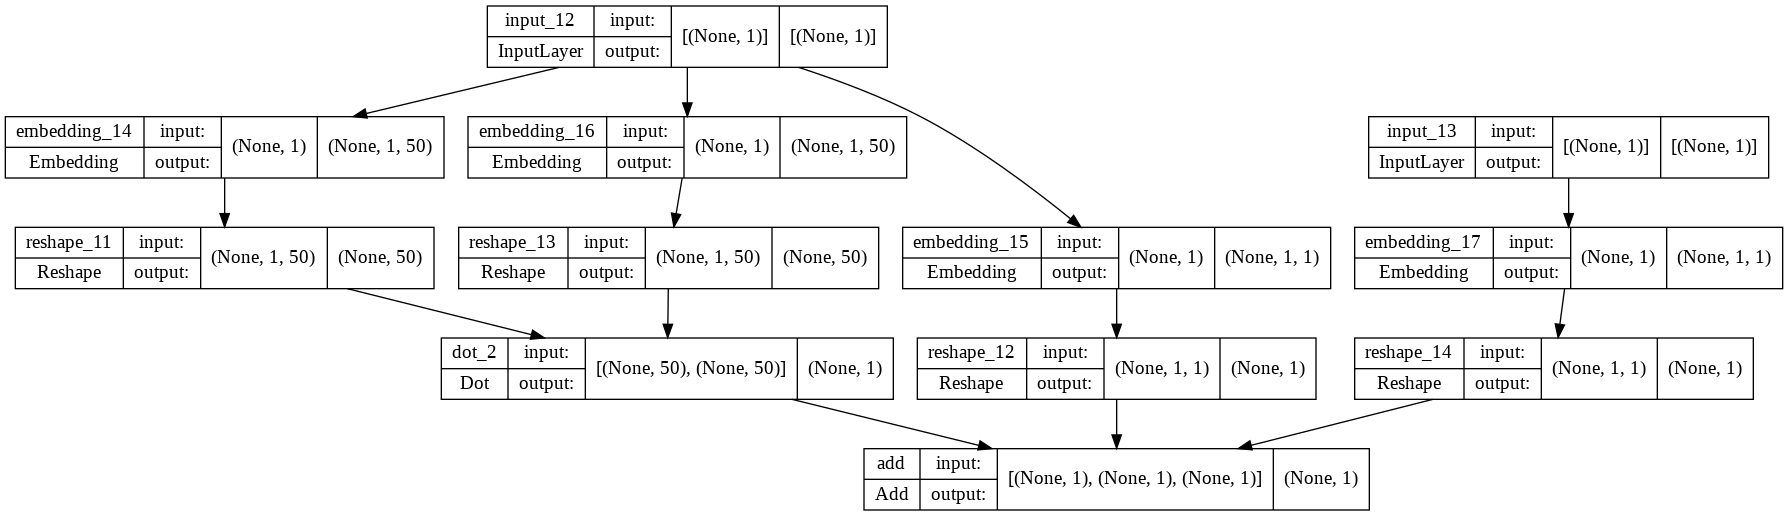

In [69]:
##define no of features(latent_factors)
emb_size=50

user=layers.Input(shape=(1,))
user_emb_layer=layers.Embedding(input_dim=n_users,output_dim=emb_size,embeddings_regularizer=regularizers.l2(1e-5))(user)
user_emb_layer=layers.Reshape((emb_size,))(user_emb_layer)

user_bias=layers.Embedding(n_users,1,embeddings_regularizer=regularizers.l2(1e-5))(user)
user_bias=layers.Reshape((1,))(user_bias)

movie=layers.Input(shape=(1,))
movie_emb_layer=layers.Embedding(input_dim=n_movies,output_dim=emb_size,embeddings_regularizer=regularizers.l2(1e-5))(user)
movie_emb_layer=layers.Reshape((emb_size,))(movie_emb_layer)

movie_bias=layers.Embedding(n_movies,1,embeddings_regularizer=regularizers.l2(1e-5))(movie)
movie_bias=layers.Reshape((1,))(movie_bias)

rating=layers.Dot(axes=1)([user_emb_layer,movie_emb_layer])

rating=layers.Add()([rating,movie_bias,user_bias])

model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = ratings[['user', 'movie']].values
y = ratings['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90752, 2) (90752,)
(10084, 2) (10084,)


In [73]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5
1418/1418 [==============================] - 13s 9ms/step - loss: 0.7926 - root_mean_squared_error: 0.8656 - val_loss: 0.8564 - val_root_mean_squared_error: 0.9016
Epoch 2/5
1418/1418 [==============================] - 15s 11ms/step - loss: 0.7804 - root_mean_squared_error: 0.8582 - val_loss: 0.8527 - val_root_mean_squared_error: 0.8991
Epoch 3/5
1418/1418 [==============================] - 16s 12ms/step - loss: 0.7709 - root_mean_squared_error: 0.8522 - val_loss: 0.8533 - val_root_mean_squared_error: 0.8991
Epoch 4/5
1418/1418 [==============================] - 17s 12ms/step - loss: 0.7646 - root_mean_squared_error: 0.8481 - val_loss: 0.8496 - val_root_mean_squared_error: 0.8965
Epoch 5/5
1418/1418 [==============================] - 17s 12ms/step - loss: 0.7591 - root_mean_squared_error: 0.8444 - val_loss: 0.8459 - val_root_mean_squared_error: 0.8942
